In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
data_test = pd.read_excel("bus.xlsx",sheet_name='data')
x = data_test.values[:,0:]
x

array([[30.329624  , 60.053589  ],
       [30.306122  , 60.058682  ],
       [30.240539  , 60.071746  ],
       ...,
       [30.21969167, 59.95460278],
       [30.22538611, 59.95617778],
       [30.2365    , 59.9561    ]])

In [24]:
def convert(): 
    newArr=[]
    for item in x:
        newArr.append(LatLongToMerc(item))
    newArr = np.array(newArr)
    return newArr
convert()

array([[3376278.2996, 8374619.1729],
       [3373662.069 , 8375753.0972],
       [3366361.4028, 8378662.5174],
       ...,
       [3364040.6886, 8352615.2979],
       [3364674.5908, 8352964.8915],
       [3365911.7834, 8352947.6267]])

In [3]:
import math
 
def LatLongToMerc(arr):
    lat = arr[1]
    lon = arr[0]
    if lat>89.5:
        lat=89.5
    if lat<-89.5:
        lat=-89.5
 
    rLat = math.radians(lat)
    rLong = math.radians(lon)
 
    a=6378137.0 #a - большая полуось эллипса;
    b=6356752.3142 #b - малая полуось эллипса;
    f=(a-b)/a
    e=math.sqrt(2*f-f**2) #эксцентриситет эллипса
    x=a*rLong
    y=a*math.log(math.tan(math.pi/4+rLat/2)*((1-e*math.sin(rLat))/(1+e*math.sin(rLat)))**(e/2))
    return [round(x,4),round(y,4)]
 


In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
def clastering(newArr):
    k_means = KMeans(init = "k-means++",n_clusters = 10,n_init=10)
    k_means.fit(newArr)
    center  = k_means.cluster_centers_
    labels = k_means.labels_
    c = Counter(labels)
    c["center"] = center
    
    obj ={}
    #obj["test"] = [[1,2]]
    #arr = [2,3]
    #obj["test"].append(arr)
    for i in range(len(labels)):
        key = str(labels[i])
        if key in obj:
            temp = obj[key]
            obj[key].append(temp)
        else:
            obj[key] = [newArr[i]]
    c["arr"] = obj
    return c
clastering(convert())

Counter({1: 6627,
         6: 5083,
         2: 4848,
         0: 1518,
         7: 1072,
         5: 1599,
         9: 1242,
         3: 1354,
         4: 735,
         8: 298,
         'center': array([[3349756.84877192, 8314979.45618325],
                [3374536.17302149, 8364817.99674098],
                [3386272.57361416, 8344785.7775027 ],
                [3320609.41344003, 8339924.05151802],
                [3289646.20758463, 8411029.97410639],
                [3409562.05722852, 8311213.60841357],
                [3371534.27070326, 8330812.99810525],
                [3351901.55286017, 8388607.12036343],
                [3293497.4875151 , 8296722.72265134],
                [3385579.4077661 , 8300047.95564984]]),
         'arr': {'1': [array([3376278.2996, 8374619.1729]),
           [...],
           [...],
           [...],
           [...],
           [...],
           [...],
           [...],
           [...],
           [...],
           [...],
           [...],
           [

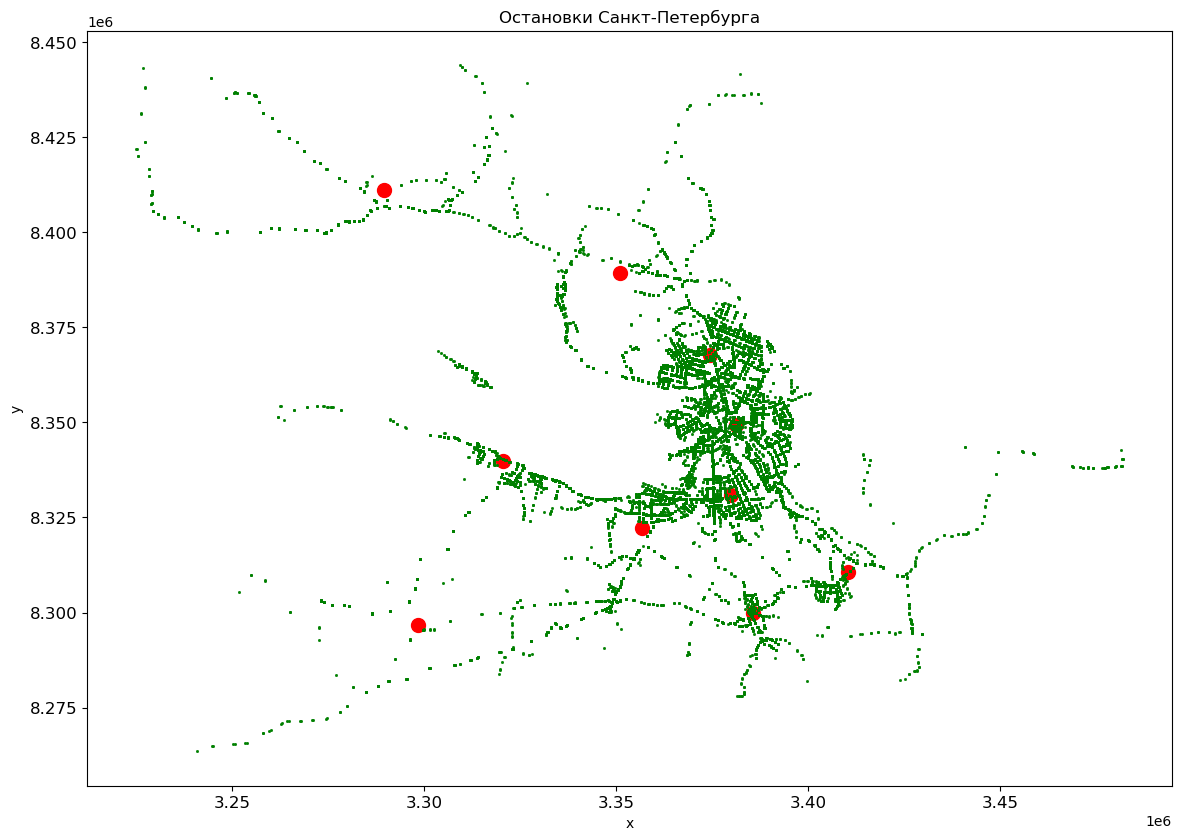

In [52]:
import matplotlib.pyplot as plt
def drow(obj,newArr):
    center = obj["center"]
#     fig,ax =plt.subplots()
    plt.figure(figsize=(14,10), dpi = 100,facecolor="w",edgecolor="k")
#     ax.plot(center[:,0],center[:,1], 'ro',markersize=10,label="Кластер")
#     ax.plot(newArr[:,0],newArr[:,1], 'gs',markersize=1,label = "Остановка")
    plt.gca().set(xlabel = "x",ylabel = "y")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
#     ax.legend()
    plt.plot(center[:,0],center[:,1], 'ro',markersize=10,label="Кластер")
    plt.plot(newArr[:,0],newArr[:,1], 'gs',markersize=1,label = "Остановка")
    plt.title("Остановки Санкт-Петербурга")
    plt.show()
data = convert()
drow(clastering(data),data)